## 如何使用xgboost

### 波士顿房价回归问题

In [1]:
import xgboost as xgb

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, auc

In [2]:
boston = load_boston()

In [3]:
boston.data.shape

(506, 13)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=9)

In [5]:
model = xgb.XGBRegressor()
model.fit(X=X_train, y=y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [6]:
y_pred = model.predict(X=X_test)

In [7]:
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8869267177127489


### 鸢尾花分类问题

In [8]:
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("whitegrid")

%matplotlib inline

In [10]:
iris = sns.load_dataset(name="iris", data_home="dataset/seaborn-data")
print(iris.shape)
iris_melt = pd.melt(iris, "species", var_name="measurement")

(150, 5)


<AxesSubplot:xlabel='measurement', ylabel='value'>

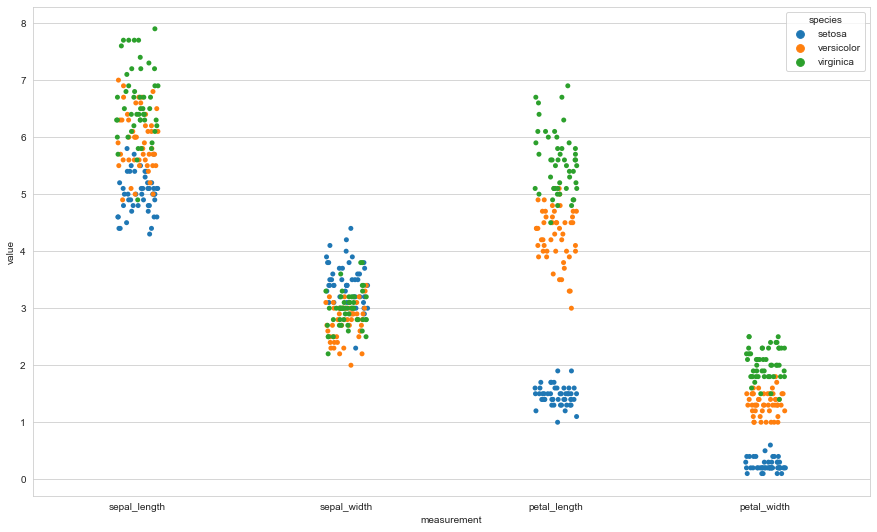

In [11]:
f, ax = plt.subplots(1, figsize=(15, 9))
sns.stripplot(x="measurement", y="value", hue="species", data=iris_melt, jitter=True, edgecolor="white", ax=ax)

In [12]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [13]:
model = xgb.XGBClassifier()
model.fit(X=X_train, y=y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [14]:
y_pred = model.predict(X=X_test)
print(f1_score(y_true=y_test, y_pred=y_pred, average="micro"))

0.9210526315789473
